In [2]:
%pip install matplotlib seaborn mysql-connector-python sqlalchemy plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine

In [4]:
#Loading the Dataset

file_path = r"C:\Users\Vivekanandh D\Downloads\ICRISAT-District Level Data - ICRISAT-District Level Data.csv"
df = pd.read_csv(file_path)

df.head()
df.shape
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [5]:
# Data Cleaning

#Cleaning Column Names

df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')

In [5]:

#Handling Missing Values
# Filling missing categorical data

df['STATE_NAME'] = df['STATE_NAME'].fillna(method='ffill')
df['DIST_NAME'] = df['DIST_NAME'].fillna('Unknown')


C:\Users\Vivekanandh D\AppData\Local\Temp\ipykernel_11340\3371024181.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['STATE_NAME'] = df['STATE_NAME'].fillna(method='ffill')


In [6]:
#Removing Duplicates
# Fill numeric missing values with median

for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

df.drop_duplicates(inplace=True)

C:\Users\Vivekanandh D\AppData\Local\Temp\ipykernel_11340\3384672921.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Vivekanandh D\AppData\Local\Temp\ipykernel_11340\3384672921.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [7]:
#Standardizing Units

for col in df.columns:
    if 'AREA' in col:
        df[col] = df[col] * 1000
    if 'PRODUCTION' in col:
        df[col] = df[col] * 1000


In [8]:
#Fixing Spelling & Data Types

df['STATE_NAME'] = df['STATE_NAME'].replace({'Orissa': 'Odisha', 'Uttaranchal': 'Uttarakhand'})
df['YEAR'] = df['YEAR'].astype(int)

In [6]:
df.to_csv("Cleaned_AgriData.csv", index=False)
print("✅ Cleaned data saved as 'Cleaned_AgriData.csv'")

✅ Cleaned data saved as 'Cleaned_AgriData.csv'


In [7]:
df

,DIST_CODE,YEAR,STATE_CODE,STATE_NAME,DIST_NAME,RICE_AREA_(1000_HA),RICE_PRODUCTION_(1000_TONS),RICE_YIELD_(KG_PER_HA),WHEAT_AREA_(1000_HA),WHEAT_PRODUCTION_(1000_TONS),...,SUGARCANE_YIELD_(KG_PER_HA),COTTON_AREA_(1000_HA),COTTON_PRODUCTION_(1000_TONS),COTTON_YIELD_(KG_PER_HA),FRUITS_AREA_(1000_HA),VEGETABLES_AREA_(1000_HA),FRUITS_AND_VEGETABLES_AREA_(1000_HA),POTATOES_AREA_(1000_HA),ONION_AREA_(1000_HA),FODDER_AREA_(1000_HA)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


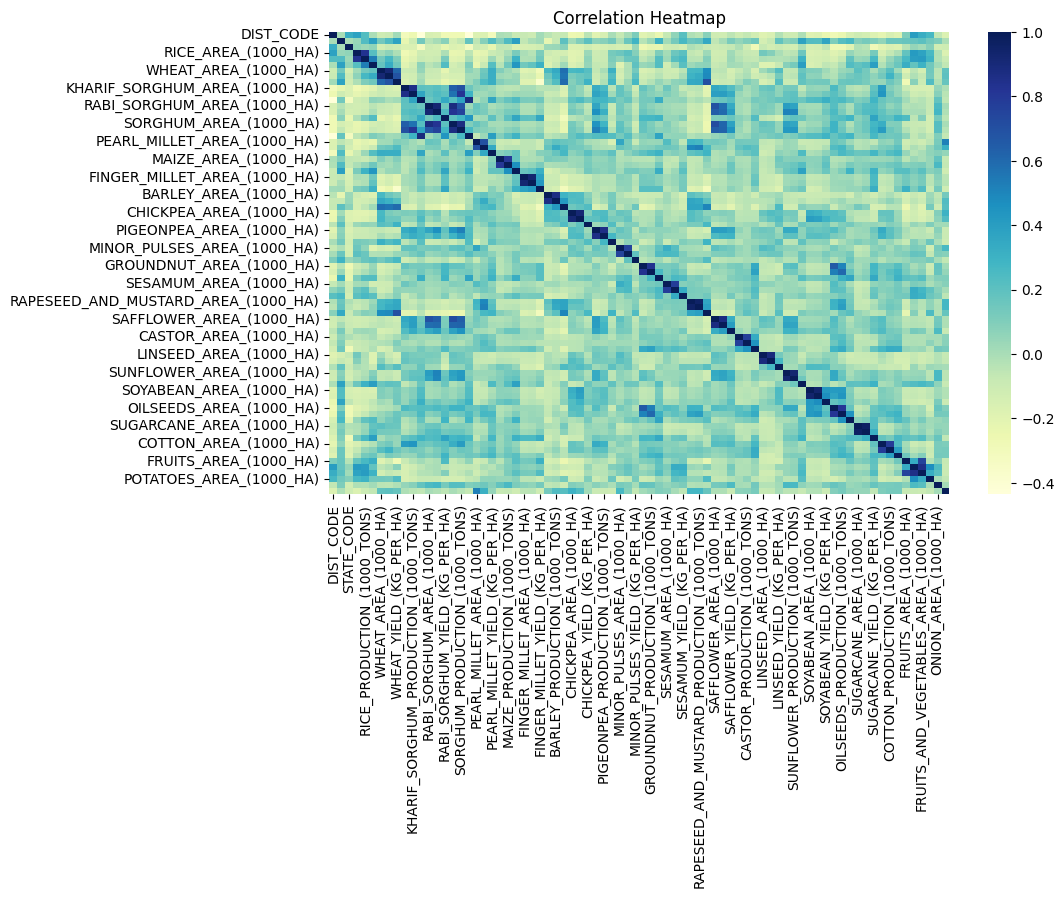

In [11]:
#EXPLORATORY DATA ANALYSIS

#Checking correlations

numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric.corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


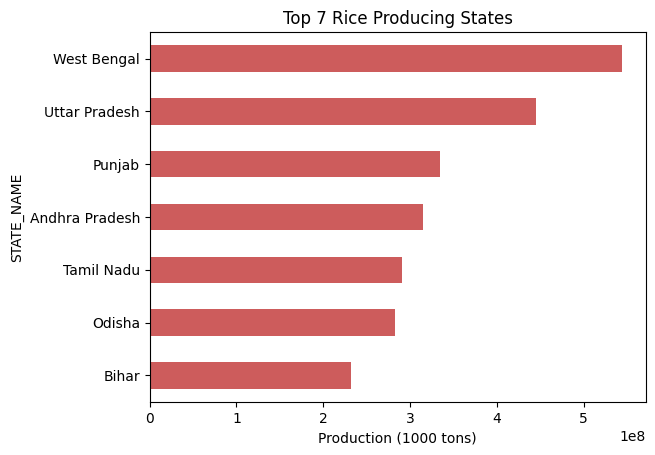

In [12]:
#Top 7 Rice Producing States (Bar Plot)

rice_top = df.groupby('STATE_NAME')['RICE_PRODUCTION_(1000_TONS)'].sum().nlargest(7)
rice_top = rice_top.sort_values(ascending=True)
rice_top.plot(kind='barh', color='indianred', title='Top 7 Rice Producing States')
plt.xlabel('Production (1000 tons)')
plt.show()


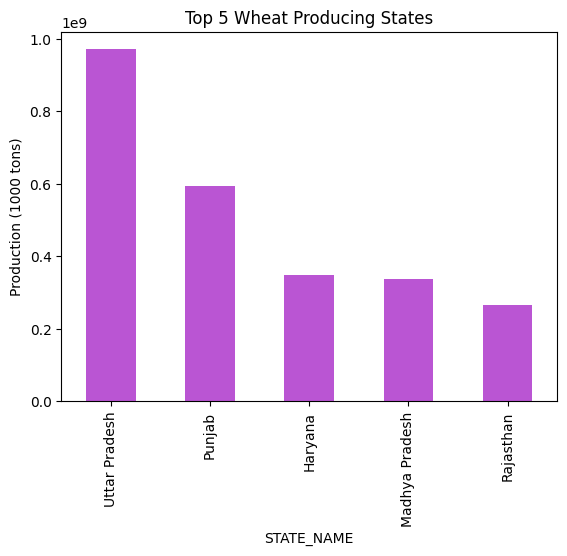

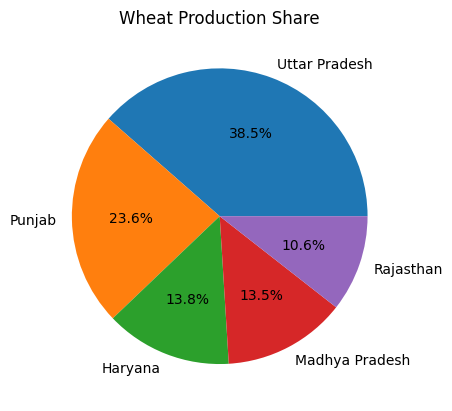

In [13]:
#Top 5 Wheat Producing States (Bar + Pie Chart)

wheat_top = df.groupby('STATE_NAME')['WHEAT_PRODUCTION_(1000_TONS)'].sum().nlargest(5)

# Bar chart
wheat_top.plot(kind='bar', color='mediumorchid', title='Top 5 Wheat Producing States')
plt.ylabel('Production (1000 tons)')
plt.show()

# Pie chart
wheat_top.plot(kind='pie', autopct='%1.1f%%', title='Wheat Production Share')
plt.ylabel('')
plt.show()


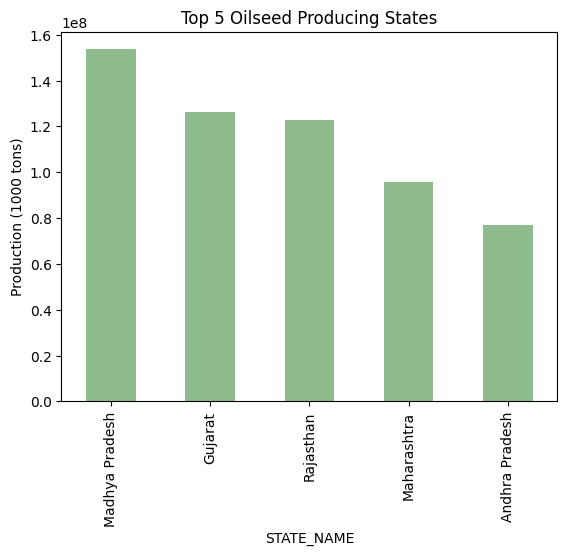

In [14]:
#Oilseed Production by Top 5 States

oil_top = df.groupby('STATE_NAME')['OILSEEDS_PRODUCTION_(1000_TONS)'].sum().nlargest(5)
oil_top.plot(kind='bar', color='darkseagreen', title='Top 5 Oilseed Producing States')
plt.ylabel('Production (1000 tons)')
plt.show()

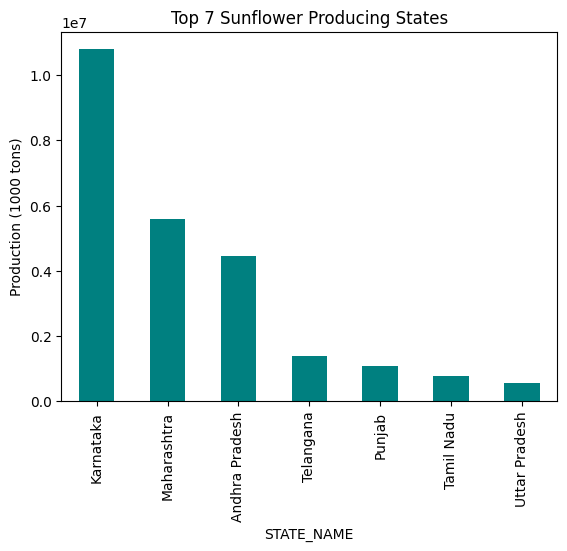

In [15]:
#Top 7 Sunflower Producing States

sun_top = df.groupby('STATE_NAME')['SUNFLOWER_PRODUCTION_(1000_TONS)'].sum().nlargest(7)
sun_top.plot(kind='bar', color='teal', title='Top 7 Sunflower Producing States')
plt.ylabel('Production (1000 tons)')
plt.show()

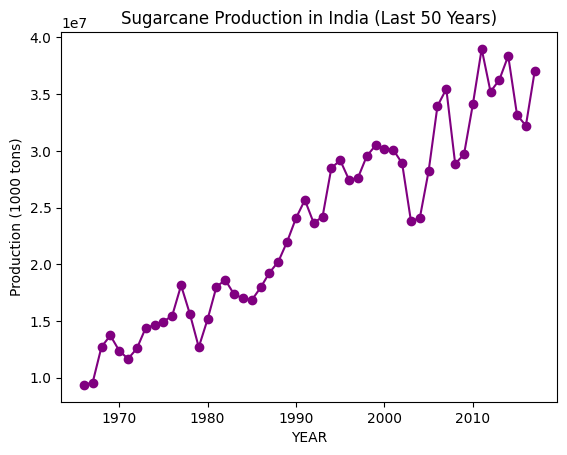

In [16]:
#India’s Sugarcane Production (Last 50 Years, Line Plot)

sugarcane_trend = df.groupby('YEAR')['SUGARCANE_PRODUCTION_(1000_TONS)'].sum()
sugarcane_trend.plot(kind='line', color='purple', marker='o', title='Sugarcane Production in India (Last 50 Years)')
plt.ylabel('Production (1000 tons)')
plt.show()

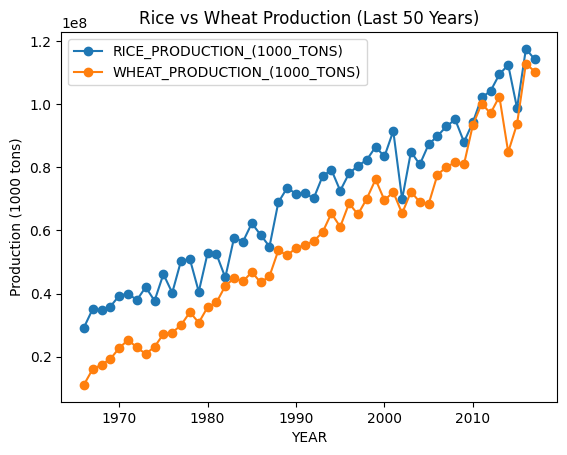

In [17]:
#Rice vs Wheat Production (Last 50 Years)

rice_wheat = df.groupby('YEAR')[['RICE_PRODUCTION_(1000_TONS)', 'WHEAT_PRODUCTION_(1000_TONS)']].sum()
rice_wheat.plot(kind='line', marker='o', title='Rice vs Wheat Production (Last 50 Years)')
plt.ylabel('Production (1000 tons)')
plt.show()

['Chhattisgarh' 'Madhya Pradesh' 'Andhra Pradesh' 'Telangana' 'Karnataka'
 'Tamil Nadu' 'Maharashtra' 'Gujarat' 'Rajasthan' 'Punjab' 'Haryana'
 'Uttar Pradesh' 'Uttarakhand' 'Assam' 'Himachal Pradesh' 'Kerala'
 'Odisha' 'West Bengal' 'Bihar' 'Jharkhand']
['CHHATTISGARH' 'MADHYA PRADESH' 'ANDHRA PRADESH' 'TELANGANA' 'KARNATAKA'
 'TAMIL NADU' 'MAHARASHTRA' 'GUJARAT' 'RAJASTHAN' 'PUNJAB' 'HARYANA'
 'UTTAR PRADESH' 'UTTARAKHAND' 'ASSAM' 'HIMACHAL PRADESH' 'KERALA'
 'ODISHA' 'WEST BENGAL' 'BIHAR' 'JHARKHAND']


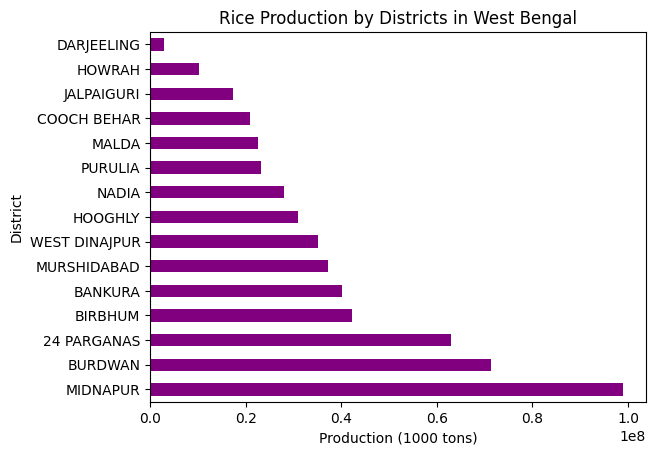

In [18]:
#Rice Production by West Bengal Districts

# Step 1: See all unique state names
print(df['STATE_NAME'].unique())

# Step 2: Strip spaces and make uppercase for consistency
df['STATE_NAME'] = df['STATE_NAME'].str.strip().str.upper()
df['DIST_NAME'] = df['DIST_NAME'].str.strip().str.upper()

# Step 3: Check again
print(df['STATE_NAME'].unique())

# Step 4: Filter West Bengal again
wb_rice = df[df['STATE_NAME'] == 'WEST BENGAL'].groupby('DIST_NAME')['RICE_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False)

# Step 5: Plot (horizontal bar looks better for districts)
wb_rice.plot(kind='barh', color='purple', title='Rice Production by Districts in West Bengal')
plt.xlabel('Production (1000 tons)')
plt.ylabel('District')
plt.show()


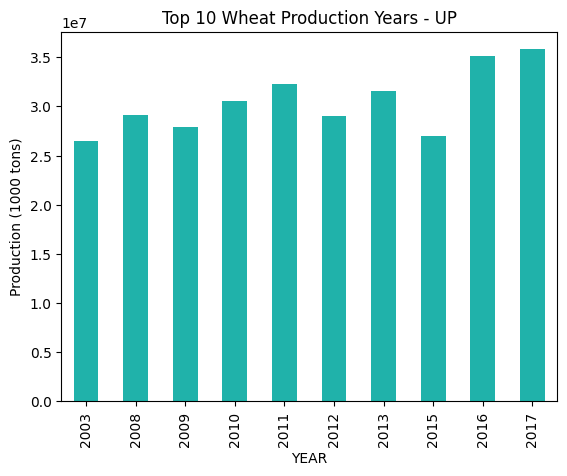

In [ ]:
#Top 10 Wheat Production Years from Uttar Pradesh

up_wheat = df[df['STATE_NAME']=='UTTAR PRADESH'].groupby('YEAR')['WHEAT_PRODUCTION_(1000_TONS)'].sum().nlargest(10)
up_wheat.sort_index().plot(kind='bar', color='lightseagreen', title='Top 10 Wheat Production Years - UP')
plt.ylabel('Production (1000 tons)')
plt.show()

Millet columns found: ['PEARL_MILLET_PRODUCTION_(1000_TONS)', 'FINGER_MILLET_PRODUCTION_(1000_TONS)']


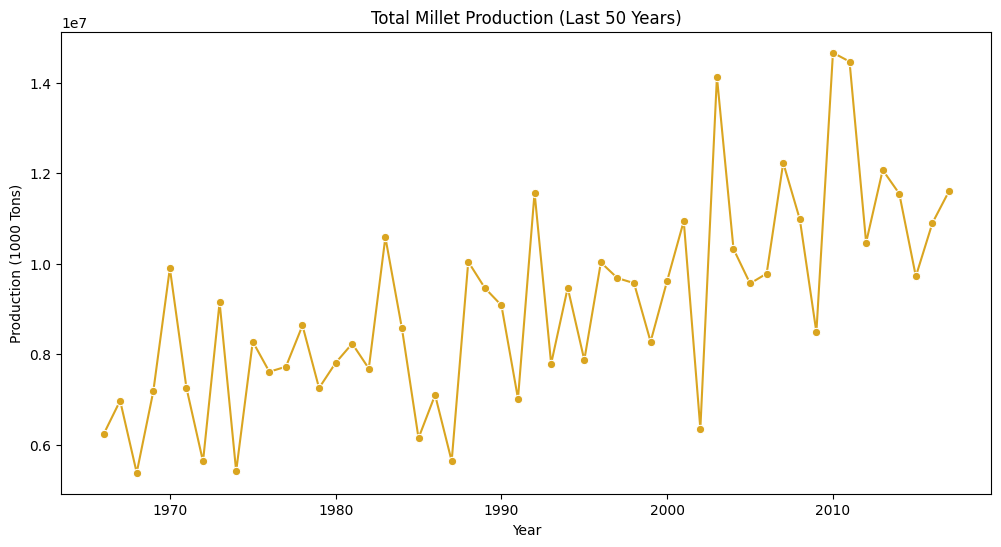

In [20]:
#Millet Production (Last 50y)

millet_cols = [col for col in df.columns if 'MILLET_PRODUCTION' in col]
print("Millet columns found:", millet_cols)

df['TOTAL_MILLET_PRODUCTION'] = df[millet_cols].sum(axis=1)
millet_trend = df.groupby('YEAR')['TOTAL_MILLET_PRODUCTION'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=millet_trend.index, y=millet_trend.values, color='goldenrod', marker='o')
plt.title("Total Millet Production (Last 50 Years)")
plt.ylabel("Production (1000 Tons)")
plt.xlabel("Year")
plt.show()


Index(['DIST_CODE', 'YEAR', 'STATE_CODE', 'STATE_NAME', 'DIST_NAME',
       'RICE_AREA_(1000_HA)', 'RICE_PRODUCTION_(1000_TONS)',
       'RICE_YIELD_(KG_PER_HA)', 'WHEAT_AREA_(1000_HA)',
       'WHEAT_PRODUCTION_(1000_TONS)', 'WHEAT_YIELD_(KG_PER_HA)',
       'KHARIF_SORGHUM_AREA_(1000_HA)',
       'KHARIF_SORGHUM_PRODUCTION_(1000_TONS)',
       'KHARIF_SORGHUM_YIELD_(KG_PER_HA)', 'RABI_SORGHUM_AREA_(1000_HA)',
       'RABI_SORGHUM_PRODUCTION_(1000_TONS)', 'RABI_SORGHUM_YIELD_(KG_PER_HA)',
       'SORGHUM_AREA_(1000_HA)', 'SORGHUM_PRODUCTION_(1000_TONS)',
       'SORGHUM_YIELD_(KG_PER_HA)', 'PEARL_MILLET_AREA_(1000_HA)',
       'PEARL_MILLET_PRODUCTION_(1000_TONS)', 'PEARL_MILLET_YIELD_(KG_PER_HA)',
       'MAIZE_AREA_(1000_HA)', 'MAIZE_PRODUCTION_(1000_TONS)',
       'MAIZE_YIELD_(KG_PER_HA)', 'FINGER_MILLET_AREA_(1000_HA)',
       'FINGER_MILLET_PRODUCTION_(1000_TONS)',
       'FINGER_MILLET_YIELD_(KG_PER_HA)', 'BARLEY_AREA_(1000_HA)',
       'BARLEY_PRODUCTION_(1000_TONS)', 'BARLEY_

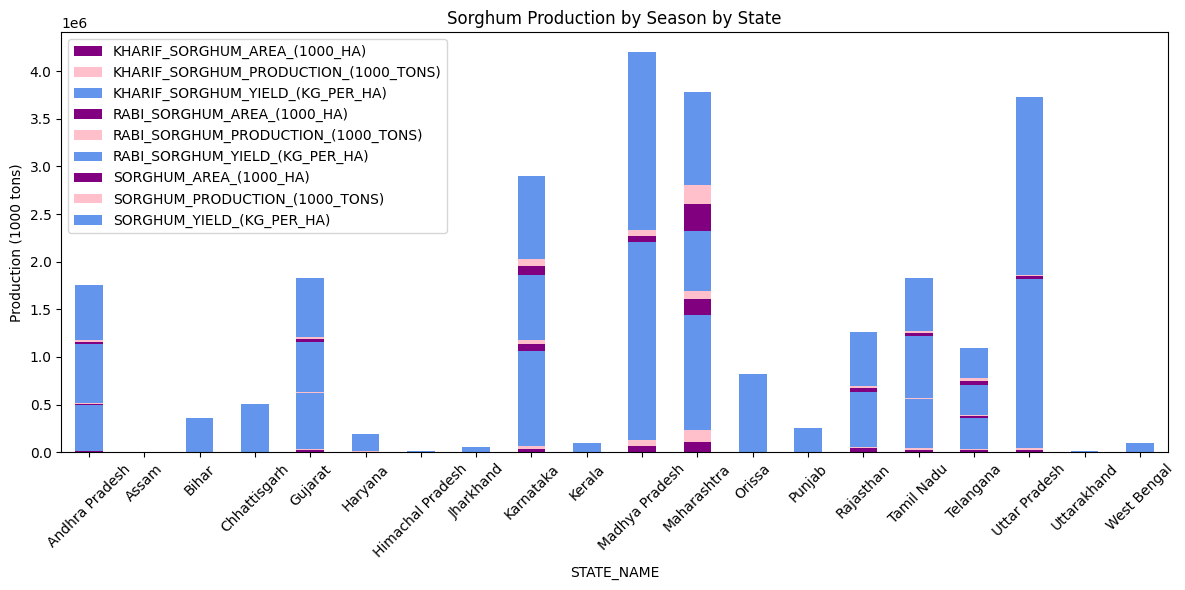

In [12]:
#Sorghum Production (Kharif and Rabi) by Region

# Check the column names first
print(df.columns)

# Automatically find sorghum columns
sorghum_cols = [col for col in df.columns if 'SORGHUM' in col.upper()]

print("Sorghum columns found:", sorghum_cols)

# Group by state and sum
sorghum_region = df.groupby('STATE_NAME')[sorghum_cols].sum()

# Plot stacked bar chart
sorghum_region.plot(kind='bar', stacked=True, figsize=(12,6), color=['purple','pink', 'cornflowerblue'], 
                    title='Sorghum Production by Season by State')
plt.ylabel('Production (1000 tons)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


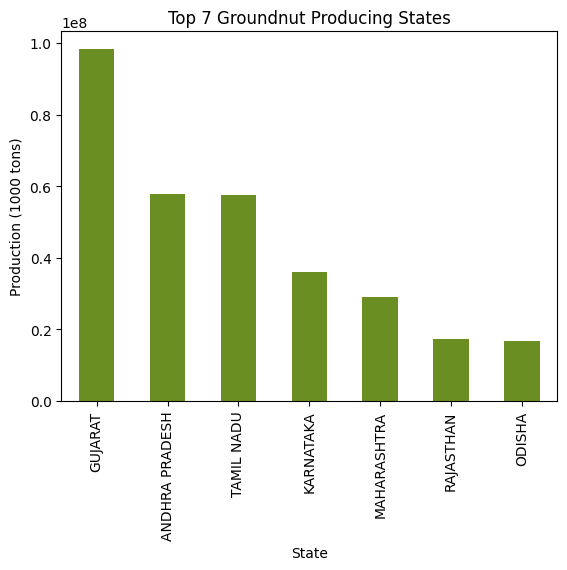

In [22]:
# Top 7 states for Groundnut production
groundnut_top = df.groupby('STATE_NAME')['GROUNDNUT_PRODUCTION_(1000_TONS)'].sum().nlargest(7)

# Plot
groundnut_top.plot(kind='bar', color='olivedrab', title='Top 7 Groundnut Producing States')
plt.ylabel('Production (1000 tons)')
plt.xlabel('State')
plt.show()



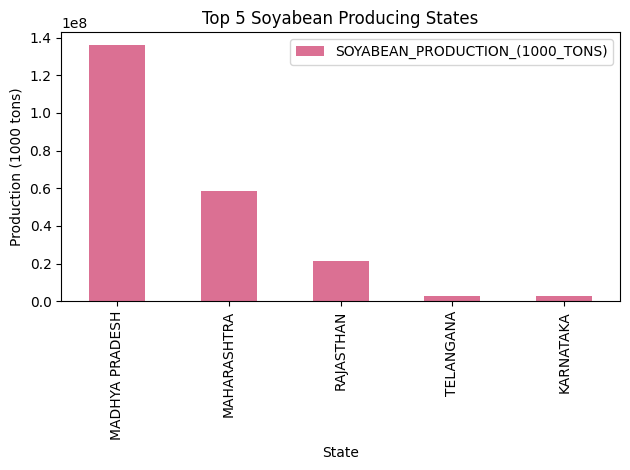

                SOYABEAN_YIELD_(KG_PER_HA)
STATE_NAME                                
MADHYA PRADESH                  1161169.25
MAHARASHTRA                      770938.60
RAJASTHAN                        404598.94
TELANGANA                        119230.77
KARNATAKA                        201773.29


In [23]:
#Soybean Production by Top 5 States and Yield Efficiency

soy_top = df.groupby('STATE_NAME')[['SOYABEAN_PRODUCTION_(1000_TONS)', 'SOYABEAN_YIELD_(KG_PER_HA)']].sum()
soy_top = soy_top.nlargest(5,'SOYABEAN_PRODUCTION_(1000_TONS)')

# Plot
soy_top.plot(kind='bar', y='SOYABEAN_PRODUCTION_(1000_TONS)', color='palevioletred',
             title='Top 5 Soyabean Producing States')
plt.ylabel('Production (1000 tons)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

# Display Yield
print(soy_top[['SOYABEAN_YIELD_(KG_PER_HA)']])

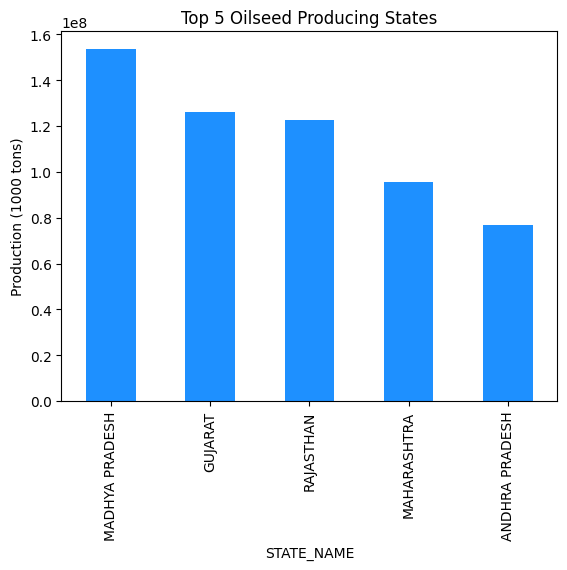

In [24]:
#Oilseed Production in Major States

oil_top = df.groupby('STATE_NAME')['OILSEEDS_PRODUCTION_(1000_TONS)'].sum().nlargest(5)
oil_top.plot(kind='bar', color='dodgerblue', title='Top 5 Oilseed Producing States')
plt.ylabel('Production (1000 tons)')
plt.show()

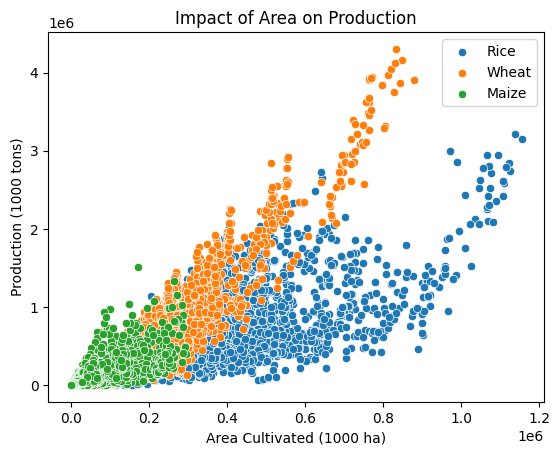

In [25]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)

sns.scatterplot(data=df, x='RICE_AREA_(1000_HA)', y='RICE_PRODUCTION_(1000_TONS)', label='Rice')
sns.scatterplot(data=df, x='WHEAT_AREA_(1000_HA)', y='WHEAT_PRODUCTION_(1000_TONS)', label='Wheat')
sns.scatterplot(data=df, x='MAIZE_AREA_(1000_HA)', y='MAIZE_PRODUCTION_(1000_TONS)', label='Maize')
plt.title('Impact of Area on Production')
plt.xlabel('Area Cultivated (1000 ha)')
plt.ylabel('Production (1000 tons)')
plt.legend()
plt.show()


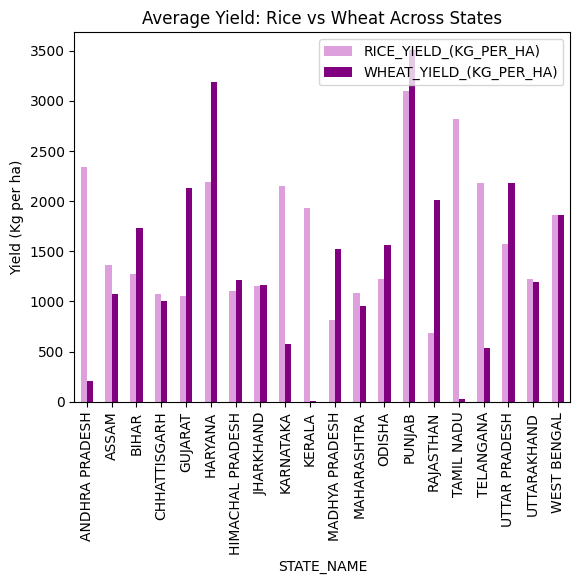

In [26]:
#Rice vs. Wheat Yield Across States

yield_compare = df.groupby('STATE_NAME')[['RICE_YIELD_(KG_PER_HA)','WHEAT_YIELD_(KG_PER_HA)']].mean()
yield_compare.plot(kind='bar', color=['plum','purple'], title='Average Yield: Rice vs Wheat Across States')
plt.ylabel('Yield (Kg per ha)')
plt.show()


In [28]:
# Saving cleaned dataset to CSV

df.to_csv('Cleaned_AgriData.csv', index=False)
print("✅ Cleaned data saved as cleaned_agriculture.csv")


✅ Cleaned data saved as cleaned_agriculture.csv
